<a href="https://colab.research.google.com/github/SukratiJain/The-Sparks-Foundation-GRIP/blob/main/TSF_Prediction_Using_UnsupervIsed_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### The Sparks Foundation
##### Graduate Rotational Internship Program
#####Task 01: Predict the percentage of an student based on the number of study hours. (Prediction Using Unsupervised ML)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

##### Importing Data From Remote Link

In [2]:
data=pd.read_csv("http://bit.ly/w-data",header=0)
data.head(15)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


##### Statistics of the data:

In [3]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


##### Data Visualization

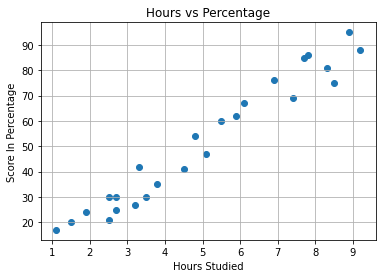

In [4]:
plt.scatter(data["Hours"],data["Scores"])
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Score In Percentage')
plt.grid(True)


###### Apparently, we can see the relationship between the number of hours studied and the score in percentage from the 2-D graph above.

##### Preparing The Data

In [6]:
#Dividing the data into Attributes (Input) and Labels (Output)

x= data.iloc[:, :-1].values
y= data.iloc[:, 1].values

In [7]:
#Splitting the data into training and test sets using sklearn.

from sklearn.model_selection import train_test_split as tts
train_x, test_x, train_y, test_y = tts(x, y, test_size=0.2, random_state=0)

##### Training Algorithm

In [8]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(train_x, train_y)
print("Training Complete")

Training Complete


##### Building Simple Linear Regression Model


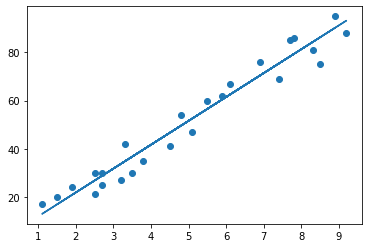

In [9]:
line= regressor.coef_*x+regressor.intercept_

plt.scatter (x,y)
plt.plot(x,line);
plt.show()

##### Making Predictions

In [10]:
#Testing data in hours
print (test_x)

#Predicting the score
pred_y = regressor.predict(test_x)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


##### Comparing actual Vs predicted score

In [11]:
data= pd.DataFrame({'Actual':test_y,'Predicted':pred_y})
data

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


##### What will be the predicted score if a student studies for 9.25 hrs/ day?

In [12]:
hours=9.25
own_pred=regressor.predict([[hours]])
print("Number of hours: {}".format(hours))
print("Predicted Score: {}".format(own_pred[0]))

Number of hours: 9.25
Predicted Score: 93.69173248737539


##### Model Evaluation
###### Error Calculation

In [13]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(test_y, pred_y))
print("R-squared Score is", r2_score(test_y, pred_y))
print('Mean squared error is', mean_squared_error(test_y, pred_y))

Mean Absolute Error:  4.183859899002982
R-squared Score is 0.9454906892105354
Mean squared error is 21.598769307217456
